In [60]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

In [61]:
data_no_wcor = numpy.load("non_wcorrected_image_autocorrs.npz")
data_wcor = numpy.load("wcorrected_image_autocorrs.npz")

In [62]:
image_no_wcor = data_no_wcor['image']
image_wcor = data_wcor['image']

image_no_wcor = numpy.nan_to_num(image_no_wcor.reshape(1,1,4,64,64))
image_wcor = numpy.nan_to_num(image_wcor.reshape(1,1,4,64,64))

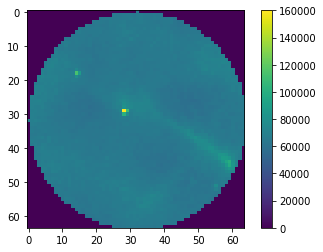

In [63]:
plt.imshow(image_wcor[0,0,0,:,:].real)
plt.colorbar()
plt.show()

In [64]:
peak_x = numpy.max(image_wcor[0,0,0,:,:])
peak_y = numpy.max(image_wcor[0,0,3,:,:])

In [65]:
# X Polarisation

image_wcor_x = image_wcor[0,0,0,:,:]/peak_x
image_no_wcor_x = image_no_wcor[0,0,0,:,:]/peak_x

image_wcor_y = image_wcor[0,0,3,:,:]/peak_y
image_no_wcor_y = image_no_wcor[0,0,3,:,:]/peak_y

In [66]:
diff_x = numpy.nan_to_num(numpy.abs(image_wcor_x - image_no_wcor_x))
diff_y = numpy.nan_to_num(numpy.abs(image_wcor_y - image_no_wcor_y))

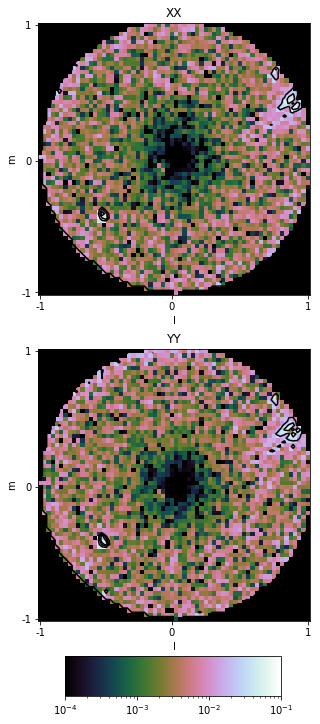

In [91]:
fig = plt.figure(figsize=(5,11))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


tick_locs = [0,31,63]
tick_names = [-1,0,1]

levels=numpy.arange(0.0,1.0,0.02)


s1 = ax1.imshow(diff_x+1e-10,cmap=plt.get_cmap('cubehelix'),norm=LogNorm(vmin=0.0001, vmax=0.1),origin='lower')
ax1.contour(diff_x, colors='k', origin='lower',levels=levels)
ax1.set_xticks(tick_locs)
ax1.set_xlabel('l')
ax1.set_yticks(tick_locs)
ax1.set_ylabel('m')
ax1.set_xticklabels(tick_names)
ax1.set_yticklabels(tick_names)
ax1.set_title("XX")

ax2.imshow(diff_y+1e-10,cmap=plt.get_cmap('cubehelix'),norm=LogNorm(vmin=0.0001, vmax=0.1),origin='lower')
ax2.contour(diff_y, colors='k', origin='lower',levels=levels)
ax2.set_xticks(tick_locs)
ax2.set_xlabel('l')
ax2.set_yticks(tick_locs)
ax2.set_ylabel('m')
ax2.set_xticklabels(tick_names)
ax2.set_yticklabels(tick_names)
ax2.set_title("XX")
ax2.set_title("YY")

cax = fig.add_axes([0.21, 0.03, 0.6, 0.05])
fig.colorbar(s1, cax=cax, orientation='horizontal')

plt.savefig('diff_dft_wcor.pdf')
plt.show()

# Plot Good DFT Image for paper..

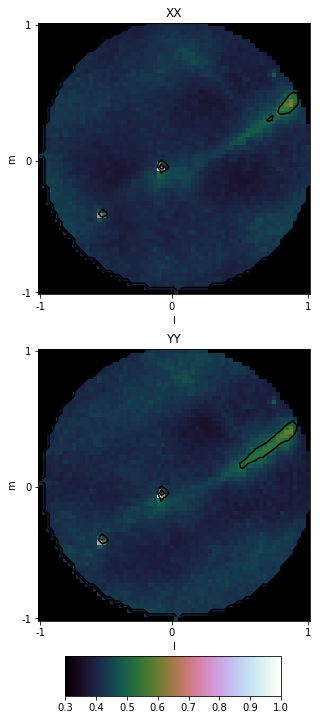

In [99]:
fig = plt.figure(figsize=(5,11))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


tick_locs = [0,31,63]
tick_names = [-1,0,1]
levels=numpy.arange(0.0,1.0,0.25)

s1 = ax1.imshow(image_wcor_x.real,cmap=plt.get_cmap('cubehelix'),norm=Normalize(vmin=0.3,vmax=1),origin='lower')
ax1.contour(image_wcor_x.real, colors='k', origin='lower',levels=levels)
ax1.set_xticks(tick_locs)
ax1.set_xlabel('l')
ax1.set_yticks(tick_locs)
ax1.set_ylabel('m')
ax1.set_xticklabels(tick_names)
ax1.set_yticklabels(tick_names)
ax1.set_title("XX")

ax2.imshow(image_wcor_y.real,cmap=plt.get_cmap('cubehelix'),norm=Normalize(vmin=0.3,vmax=1),origin='lower')
ax2.contour(image_wcor_y.real, colors='k', origin='lower',levels=levels)
ax2.set_xticks(tick_locs)
ax2.set_xlabel('l')
ax2.set_yticks(tick_locs)
ax2.set_ylabel('m')
ax2.set_xticklabels(tick_names)
ax2.set_yticklabels(tick_names)
ax2.set_title("YY")

cax = fig.add_axes([0.21, 0.03, 0.6, 0.05])
fig.colorbar(s1, cax=cax, orientation='horizontal')

plt.savefig('dft_image.pdf')
plt.show()

#### 